In [ ]:
#loading the Libraries

In [1]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 33.1MB/s 
     |████████████████████████████████| 9.5MB 38.9MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
#loading the common libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
pd.options.display.max_rows=50
pd.options.display.max_columns=10
from pmdarima import auto_arima
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [4]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,4)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'

In [5]:
#loading the data for the first time

In [6]:
data1 = pd.read_excel(r"/content/sample_data/tsf.xlsx")

In [7]:
#loading the data for the second time

In [8]:
data2 = pd.read_excel(r"/content/sample_data/tsf.xlsx")

In [ ]:
#header of the file for first load

In [9]:
data1.head()

,date of week start,season type,distributers,fixed pay,cost of raw materails,other expenditure,cash out,net profit margin,cash in
0,2010-01-04,0,14,540000,537000,375000,1452000,0.49,2163480
1,2010-01-11,1,18,900000,604800,520800,2025600,0.66,3362496
2,2010-01-18,1,16,1020000,505200,597600,2122800,0.53,3247884
3,2010-01-25,2,32,1275000,696800,1072500,3044300,0.85,5631955
4,2010-02-01,2,29,1325000,592800,1138500,3056300,0.80,5501340


In [10]:
#tail of the dataset

In [ ]:
data1.tail()

,date of week start,season type,distributers,fixed pay,cost of raw materails,other expenditure,cash out,net profit margin,cash in
566,2020-11-09,1,19,840000,504000,594000,1938000,0.59,3081420
567,2020-11-16,0,16,525000,546000,383000,1454000,0.44,2093760
568,2020-11-23,0,10,600000,531000,360000,1491000,0.44,2147040
569,2020-11-30,1,20,1000000,595200,520800,2116000,0.72,3639520
570,2020-12-07,1,16,1000000,561600,519600,2081200,0.65,3433980


In [ ]:
#shape of the dataset

In [11]:
data1.shape

(571, 9)

In [ ]:
#description of the dataset

In [12]:
data1.describe()

,season type,distributers,fixed pay,cost of raw materails,other expenditure,cash out,net profit margin,cash in
count,571.000000,571.000000,5.710000e+02,571.000000,5.710000e+02,5.710000e+02,571.000000,5.710000e+02
mean,0.998249,18.457093,9.377846e+05,589510.858144,6.895771e+05,2.216873e+06,0.629545,3.731430e+06
std,0.707105,5.428595,2.784400e+05,70055.990048,3.548050e+05,6.678148e+05,0.200025,1.566351e+06
min,0.000000,10.000000,5.250000e+05,492000.000000,3.500000e+05,1.418000e+06,0.250000,1.806840e+06
25%,0.500000,15.000000,7.175000e+05,542400.000000,4.510000e+05,1.718650e+06,0.500000,2.625920e+06
50%,1.000000,18.000000,9.200000e+05,574800.000000,5.508000e+05,2.021600e+06,0.630000,3.285892e+06
75%,1.000000,20.000000,1.020000e+06,604800.000000,6.108000e+05,2.214600e+06,0.750000,3.811886e+06
max,2.000000,32.000000,1.400000e+06,798400.000000,1.497000e+06,3.615100e+06,1.000000,7.118496e+06


In [13]:
#relation between season type and distributers with the Profit margin

In [14]:
data1=data1.groupby(['season type','distributers'])['net profit margin'].sum()
data1=data1.reset_index()
data1.head(10)

,season type,distributers,net profit margin
0,0,10,8.75
1,0,11,8.24
2,0,12,10.41
3,0,13,7.56
4,0,14,5.83
5,0,15,5.46
6,0,16,6.33
7,1,15,31.87
8,1,16,29.44
9,1,17,24.13


In [ ]:
#from the above screenshot we can see that the for th distributer 15 the profit margin is more compared to rest

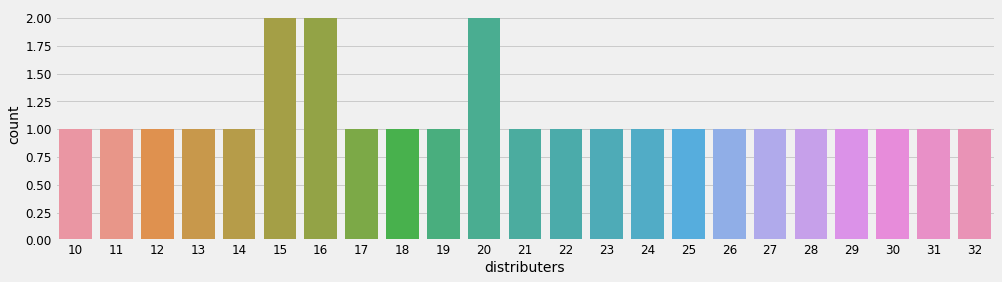

In [ ]:
sns.countplot(x="distributers", data=data1)

In [15]:
#from the above image we can see that the for the distributers 15,16 and 2o the count is more compared to rest

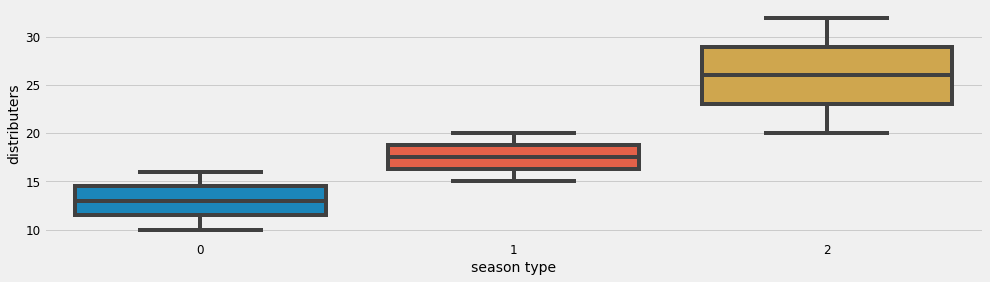

In [16]:
sns.boxplot(x='season type',y='distributers',data=data1)

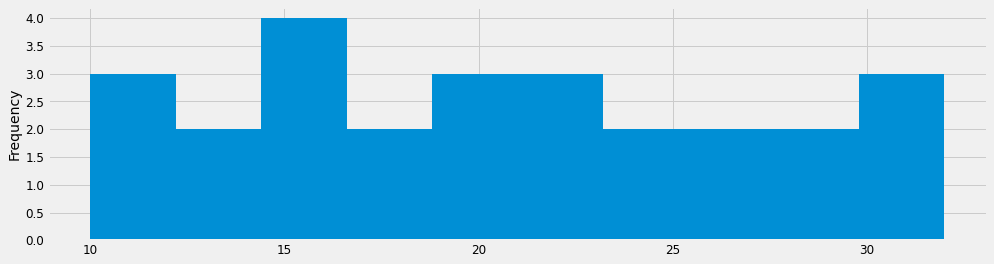

In [17]:
data1["distributers"].plot.hist()

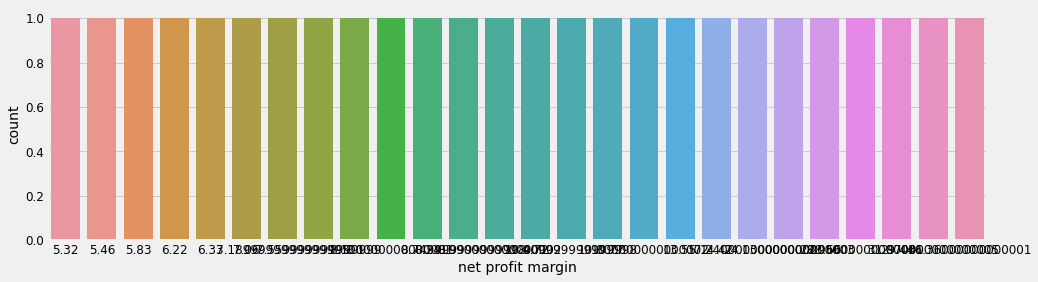

In [ ]:
sns.countplot(x="net profit margin", data=data1)

In [ ]:
#finding out the null values

In [ ]:
data1.isnull().sum()

season type          0
distributers         0
net profit margin    0
dtype: int64

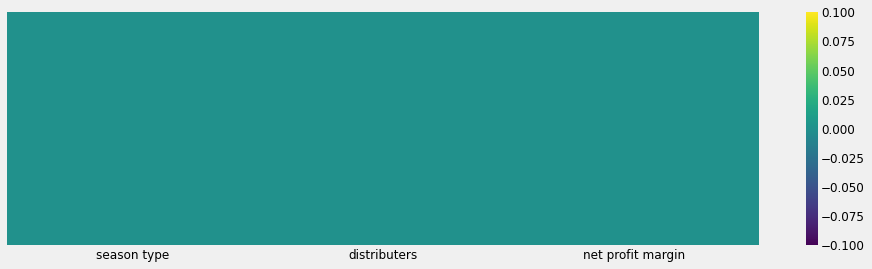

In [18]:
sns.heatmap(data1.isnull(),yticklabels=False, cmap="viridis")

In [19]:
df=data2[["date of week start","net profit margin"]]
date = data2[["date of week start","net profit margin"]]

In [ ]:
#header of the dataframe

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date of week start  571 non-null    datetime64[ns]
 1   net profit margin   571 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.0 KB


In [21]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date of week start  571 non-null    datetime64[ns]
 1   net profit margin   571 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.0 KB


In [ ]:
#Finding out the time span betweeb the dates

In [23]:
df['date of week start'].max() - df['date of week start'].min()

Timedelta('3990 days 00:00:00')

In [25]:
#finding out the day of the week and name of the month

In [26]:
df['DayOfWeek'] = df['date of week start'].dt.day_name()
print(df['DayOfWeek'])
df['month_name'] = df['date of week start'].dt.month_name()
print(df['month_name'])

0      Monday
1      Monday
2      Monday
3      Monday
4      Monday
        ...  
566    Monday
567    Monday
568    Monday
569    Monday
570    Monday
Name: DayOfWeek, Length: 571, dtype: object
0       January
1       January
2       January
3       January
4      February
         ...   
566    November
567    November
568    November
569    November
570    December
Name: month_name, Length: 571, dtype: object


In [27]:
df.set_index('date of week start',inplace=True)

In [28]:
df

,net profit margin,DayOfWeek,month_name
date of week start,,,
2010-01-04,0.49,Monday,January
2010-01-11,0.66,Monday,January
2010-01-18,0.53,Monday,January
2010-01-25,0.85,Monday,January
2010-02-01,0.80,Monday,February
...,...,...,...
2020-11-09,0.59,Monday,November
2020-11-16,0.44,Monday,November
2020-11-23,0.44,Monday,November


In [29]:
#Understanding Weekly Order Quantity mean
weekly_df=df.resample('W').mean()

In [30]:
weekly_df

,net profit margin
date of week start,
2010-01-10,0.49
2010-01-17,0.66
2010-01-24,0.53
2010-01-31,0.85
2010-02-07,0.80
...,...
2020-11-15,0.59
2020-11-22,0.44
2020-11-29,0.44


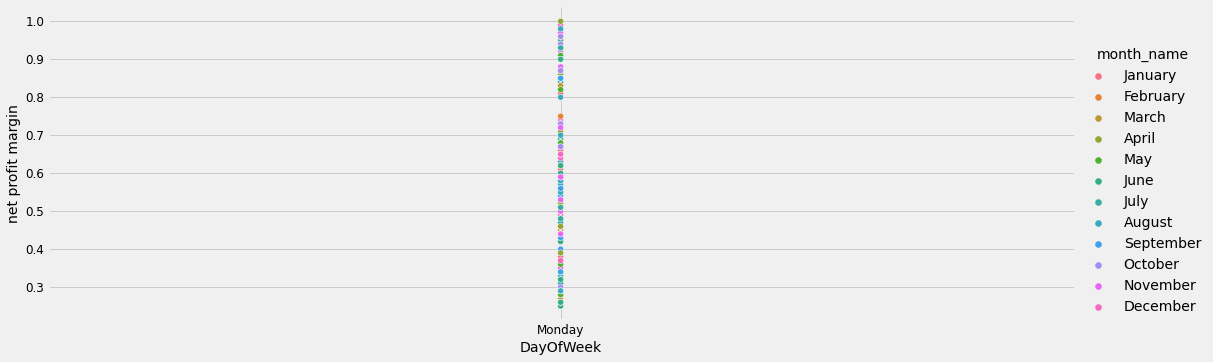

In [31]:
sns.relplot(x="DayOfWeek",y="net profit margin",hue="month_name",data=df,height=5,aspect=3)

In [32]:
df.loc[df['net profit margin']>0.5]

,net profit margin,DayOfWeek,month_name
date of week start,,,
2010-01-11,0.66,Monday,January
2010-01-18,0.53,Monday,January
2010-01-25,0.85,Monday,January
2010-02-01,0.80,Monday,February
2010-02-08,0.65,Monday,February
...,...,...,...
2020-10-26,0.87,Monday,October
2020-11-02,0.53,Monday,November
2020-11-09,0.59,Monday,November


In [33]:
df.head()

,net profit margin,DayOfWeek,month_name
date of week start,,,
2010-01-04,0.49,Monday,January
2010-01-11,0.66,Monday,January
2010-01-18,0.53,Monday,January
2010-01-25,0.85,Monday,January
2010-02-01,0.80,Monday,February


In [37]:
df['2020']

,net profit margin,DayOfWeek,month_name
date of week start,,,
2020-01-06,0.73,Monday,January
2020-01-13,0.81,Monday,January
2020-01-20,0.83,Monday,January
2020-01-27,0.66,Monday,January
2020-02-03,0.67,Monday,February
2020-02-10,0.43,Monday,February
2020-02-17,0.42,Monday,February
2020-02-24,0.75,Monday,February
2020-03-02,0.59,Monday,March


In [39]:
df['2019']

,net profit margin,DayOfWeek,month_name
date of week start,,,
2019-01-07,0.65,Monday,January
2019-01-14,0.48,Monday,January
2019-01-21,0.43,Monday,January
2019-01-28,0.61,Monday,January
2019-02-04,0.71,Monday,February
...,...,...,...
2019-12-02,0.51,Monday,December
2019-12-09,0.74,Monday,December
2019-12-16,0.37,Monday,December


In [43]:
df['2020-01':'2020-05']['net profit margin'].mean()

0.6752380952380952

In [44]:
df['2019-07':'2019-12']['net profit margin'].mean()

0.5974074074074074

In [45]:
date = date.groupby(["date of week start"])['net profit margin'].sum().reset_index()
date.head()

,date of week start,net profit margin
0,2010-01-04,0.49
1,2010-01-11,0.66
2,2010-01-18,0.53
3,2010-01-25,0.85
4,2010-02-01,0.80


In [46]:
date=date[["date of week start"]]

In [47]:
dummny_dates=pd.date_range(start='2018-12-04',end='2020-05-15')
dummny_dates=dummny_dates.to_frame(index = False)
dummny_dates.columns=["date of week start"]
x = pd.concat([date, dummny_dates])
y = x.drop_duplicates(keep=False, inplace=False)
y['DayOfWeek'] = y['date of week start'].dt.day_name()
y['month_name'] = y['date of week start'].dt.month_name()
holidays=y.reset_index(drop=True)
holidays["DayOfWeek"].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [48]:
holidays

,date of week start,DayOfWeek,month_name
0,2010-01-04,Monday,January
1,2010-01-11,Monday,January
2,2010-01-18,Monday,January
3,2010-01-25,Monday,January
4,2010-02-01,Monday,February
...,...,...,...
945,2020-05-10,Sunday,May
946,2020-05-12,Tuesday,May
947,2020-05-13,Wednesday,May
948,2020-05-14,Thursday,May


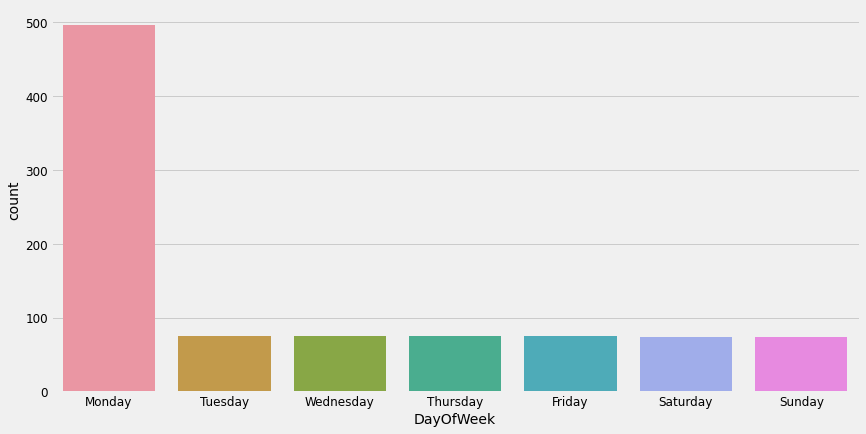

In [49]:
sns.catplot(x = 'DayOfWeek', data = holidays, kind = 'count',height=6,aspect=2)

In [50]:
daily_df = df.groupby(["date of week start","DayOfWeek","month_name"])['net profit margin'].sum().reset_index()
daily_df.head()


,date of week start,DayOfWeek,month_name,net profit margin
0,2010-01-04,Monday,January,0.49
1,2010-01-11,Monday,January,0.66
2,2010-01-18,Monday,January,0.53
3,2010-01-25,Monday,January,0.85
4,2010-02-01,Monday,February,0.80


In [51]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Order_Quantity):
    result=adfuller(Order_Quantity)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(daily_df['net profit margin'])

ADF Test Statistic : -6.20824237236578
p-value : 5.5892042244281055e-08
#Lags Used : 19
Number of Observations Used : 551
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


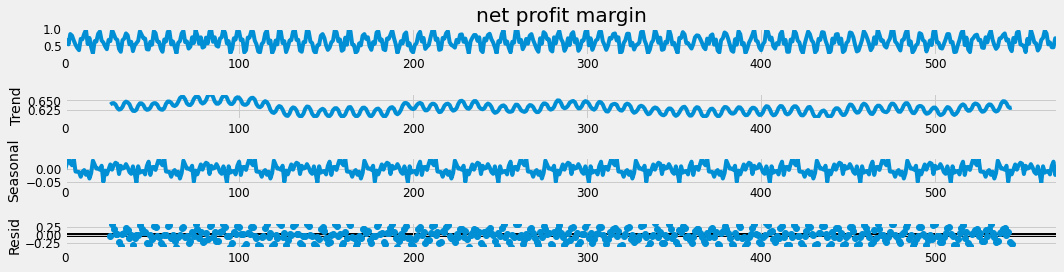

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose
final = seasonal_decompose(daily_df['net profit margin'],model='additive', freq = 52) # annual=1,Quaterly=4,monthly=12,weekly=52
final.plot();

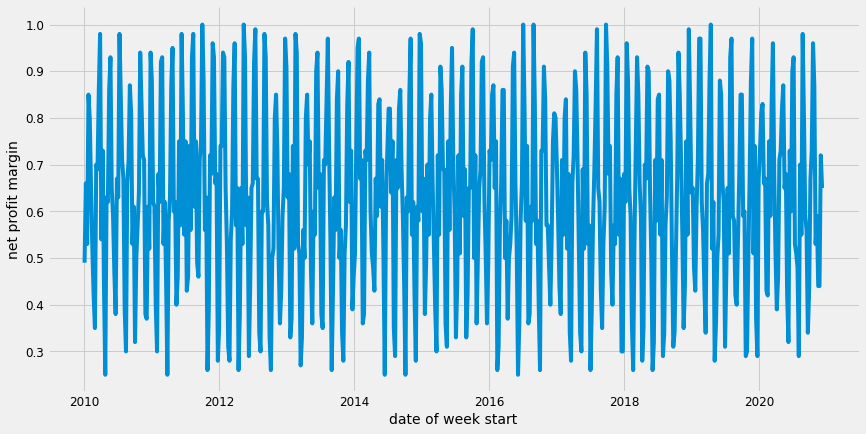

In [53]:
sns.relplot(x = 'date of week start', y = 'net profit margin', data = data2, kind = 'line',height=6,aspect=2)

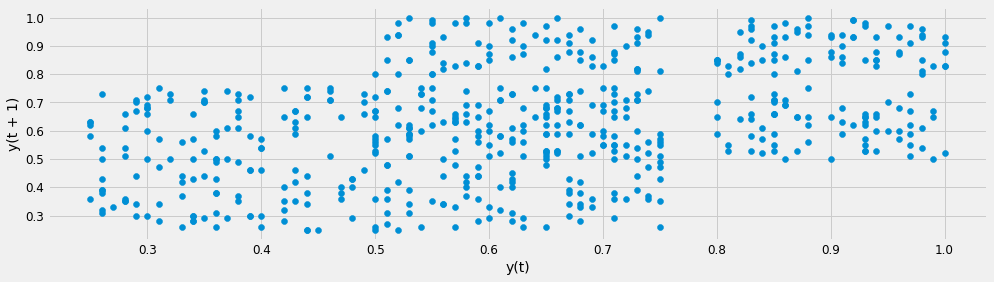

In [54]:
from pandas.plotting import lag_plot
lag_plot(data2["net profit margin"])
plt.show()

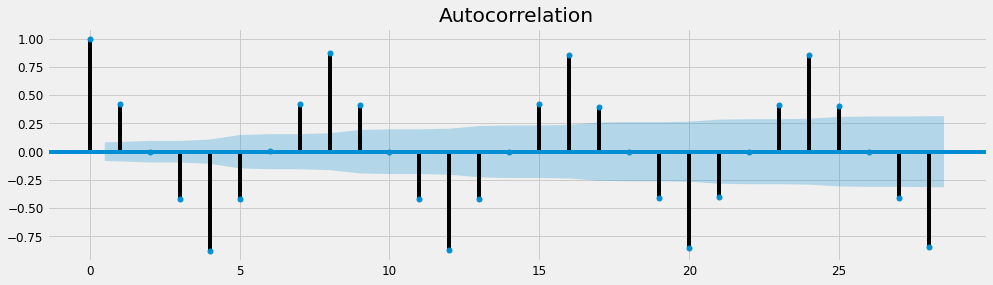

In [55]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data2["net profit margin"])
plt.show()

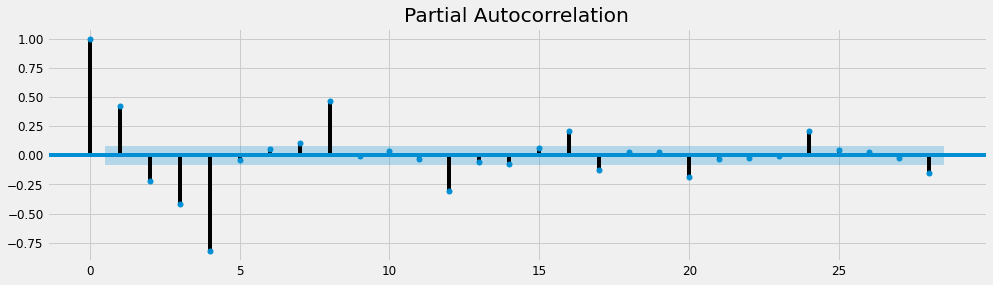

In [56]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data2["net profit margin"])
plt.show()

In [58]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(data2['net profit margin'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-934.796, Time=1.32 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-214.409, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-324.174, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-343.153, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1148.782, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-401.092, Time=0.38 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-542.153, Time=1.24 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-876.628, Time=1.56 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1029.088, Time=1.28 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-473.111, Time=1.75 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.54 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=-899.524, Time=1.62 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-637.219, Time=1.34 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=1.80 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=

In [59]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(data2['net profit margin'],order=(2,0,3)) #(3,0,2)
model=model.fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:      net profit margin   No. Observations:                  571
Model:                     ARMA(2, 3)   Log Likelihood                 511.143
Method:                       css-mle   S.D. of innovations                nan
Date:                Thu, 17 Jun 2021   AIC                          -1008.287
Time:                        11:56:18   BIC                           -977.855
Sample:                             0   HQIC                          -996.414
                                                                              
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.6307      0.000   1276.323      0.000       0.630       0.632
ar.L1.net profit margin     1.4143      0.001   1276.276      0.000       1.412       1.416
ar.L2.net profit margin    -1.0000        nan        nan        nan         nan         nan
ma.L1.net profit margin    -1.7115      0.045    -37.965      0.000      -1.800      -1.623
ma.L2.net profit margin     1.4297      0.068     20.960      0.000       1.296       1.563
ma.L3.net profit margin    -0.3446      0.034    -10.077      0.000      -0.412      -0.278
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.7071           -0.7071j            1.0000           -0.1250
AR.2            0.7071           +0.7071j            1.0000            0.1250
MA.1            0.7184           -0.7443j            1.0344           -0.1278
MA.2            0.7184           +0.7443j            1.0344            0.1278
MA.3            2.7119           -0.0000j            2.7119           -0.0000
-----------------------------------------------------------------------------
"""

In [60]:
model.predict()

0      0.630651
1      0.531194
2      0.812786
3      0.674870
4      0.733478
         ...   
566    0.549230
567    0.378567
568    0.403751
569    0.563399
570    0.710265
Length: 571, dtype: float64

In [61]:
from pmdarima.arima import auto_arima
#Autoarima gives us bet model suited for the data
# p - number of autoregressive terms (AR)
# q - Number of moving avergae terms (MA)
# d - number of non-seasonal differences
#p, d, q represent non-seasonal components
#P, D, Q represent seasonal components
arima_model = auto_arima(data2['net profit margin'], start_p = 1, d=1, start_q = 1, 
                          max_p = 5, max_q = 5, max_d=5, m = 12, 
                          start_P = 0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5,
                          seasonal = True, 
                          trace = True, 
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = True, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=1.30 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=583.528, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=inf, Time=0.74 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.66 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=1.41 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=-641.943, Time=0.59 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=6.95 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=8.89 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=inf, Time=6.07 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=inf, Time=0.79 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=9.27 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=-781.438, Time=1.14 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=2.39 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=11.27 sec
 ARIMA(1,1,0

In [62]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model1=SARIMAX(data2['net profit margin'],order=(2,1,2),seasonal_order=(0,1,1,12))
results=model1.fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                    net profit margin   No. Observations:                  571
Model:             SARIMAX(2, 1, 2)x(0, 1, [1], 12)   Log Likelihood                 145.192
Date:                              Thu, 17 Jun 2021   AIC                           -278.383
Time:                                      12:02:59   BIC                           -252.437
Sample:                                           0   HQIC                          -268.250
                                              - 571                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2507      0.099     -2.543      0.011      -0.444      -0.058
ar.L2          0.1582      0.086      1.844      0.065      -0.010       0.326
ma.L1         -0.2059      8.410     -0.024      0.980     -16.690      16.278
ma.L2         -0.7940      6.684     -0.119      0.905     -13.895      12.307
ma.S.L12      -0.9995      3.313     -0.302      0.763      -7.494       5.495
sigma2         0.0314      0.279      0.113      0.910      -0.515       0.578
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 2.72
Prob(Q):                              0.78   Prob(JB):                         0.26
Heteroskedasticity (H):               0.94   Skew:                            -0.11
Prob(H) (two-sided):                  0.66   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

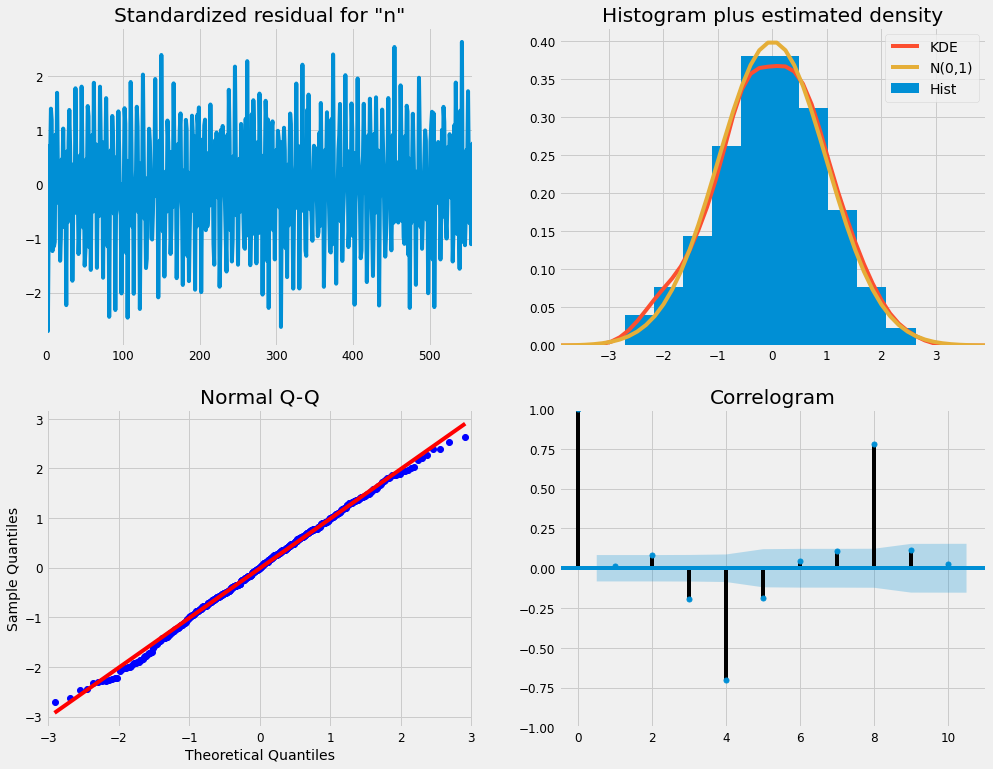

In [63]:
results.plot_diagnostics(figsize=(15, 12)) 
plt.show()

In [65]:
model3=SARIMAX(data2['net profit margin'],order=(1,1,2),seasonal_order=(5,1,0,12))
model3=model3.fit()

In [66]:
index_future_dates=pd.date_range(start='2020-05-15',end='2020-05-31')
#print(index_future_dates)
pred=model3.predict(start=len(data2),end=len(data2)+16).rename('SARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2020-05-15    0.871014
2020-05-16    0.898348
2020-05-17    0.584855
2020-05-18    0.580382
2020-05-19    0.461766
2020-05-20    0.369876
2020-05-21    0.662830
2020-05-22    0.596331
2020-05-23    0.891195
2020-05-24    0.863514
2020-05-25    0.619179
2020-05-26    0.560996
2020-05-27    0.346267
2020-05-28    0.405794
2020-05-29    0.639936
2020-05-30    0.717545
2020-05-31    0.886839
Freq: D, Name: SARIMA Predictions, dtype: float64
